# Neurosynth Analysis - Thresholded Juror fMRI Maps - Plot Null Model Histograms

## Import packages & data

In [1]:
#basic
import os
import glob
import pandas as pd
import numpy as np

#plotting (histograms)
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
from matplotlib import gridspec
import matplotlib.pyplot as plt


## Font settings

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({"ps.useafm": True})
plt.rc('pdf',fonttype=42)

## Get R^2 & BIC percentiles (open from saved csv)

In [3]:
#simple percentile
ks = [2,3]
k_vals = []
k_r2s = []
k_bics = []

for k in ks:
    res_r2 = pd.read_csv('resampling/resampling_r2_values_scenario_thresholded_k%s.csv'%k)
    r2 = pd.Series(res_r2['scenario_r2'])
    bic = pd.Series(res_r2['scenario_bic'])
    k_vals.append(k)
    arr = np.array([.95])
    arr2 = np.array([.05])
    
    res_scenario_r2_95_perc_rank = r2.quantile(arr)
    k_r2s.append(res_scenario_r2_95_perc_rank.iloc[0])
    print('R^2 for %s topics'%k)
    print(res_scenario_r2_95_perc_rank)
    
    res_scenario_bic_95_perc_rank = bic.quantile(arr2)
    k_bics.append(res_scenario_bic_95_perc_rank.iloc[0])
    print('BIC for %s topics'%k)
    print(res_scenario_bic_95_perc_rank)

k_vals = pd.DataFrame(k_vals,columns=['num_topics'])
k_r2s = pd.DataFrame(k_r2s, columns=['r2'])
k_bics = pd.DataFrame(k_bics, columns=['bic'])

r2 = [k_vals, k_r2s]
r2_dat = pd.concat(r2, axis=1)
print(r2_dat)
#r2_dat.to_csv('resampling/null_model_scenario_r2.csv',index=False)

bic = [k_vals, k_bics]
bic_dat = pd.concat(bic, axis=1)
print(bic_dat)

R^2 for 2 topics
0.95    0.029922
Name: scenario_r2, dtype: float64
BIC for 2 topics
0.05    3382.628798
Name: scenario_bic, dtype: float64
R^2 for 3 topics
0.95    0.039044
Name: scenario_r2, dtype: float64
BIC for 3 topics
0.05    3345.77152
Name: scenario_bic, dtype: float64
   num_topics        r2
0           2  0.029922
1           3  0.039044
   num_topics          bic
0           2  3382.628798
1           3  3345.771520


## Get Actual Model R^2 & BIC

In [4]:
actual_r2 = pd.read_csv('decoding_output/model_r2_thresholded_scenario.csv')
actual_bic = pd.read_csv('decoding_output/model_bic_thresholded_scenario.csv')

#subset
models = ['affect', 'moral_judgment_mj', 'moral_judgment_social', 'exp_cult_recall_narrative_cult_id_bias']
  
# selecting rows based on condition
actual_r2 = actual_r2[actual_r2['model'].isin(models)].reset_index()
print(actual_r2)

actual_bic = actual_bic[actual_bic['model'].isin(models)].reset_index()
print(actual_bic)

   index  Unnamed: 0     event                                   model  \
0      4           4  scenario                                  affect   
1     11          11  scenario                   moral_judgment_social   
2     12          12  scenario                       moral_judgment_mj   
3     13          13  scenario  exp_cult_recall_narrative_cult_id_bias   

         r2  
0  0.004215  
1  0.045235  
2  0.011705  
3  0.054201  
   index  Unnamed: 0     event                                   model  \
0      4           4  scenario                                  affect   
1     11          11  scenario                   moral_judgment_social   
2     12          12  scenario                       moral_judgment_mj   
3     13          13  scenario  exp_cult_recall_narrative_cult_id_bias   

           bic  
0  3512.750220  
1  3308.006004  
2  3469.884207  
3  3263.757252  


## Plot null R^2 values only

Text(0.5, 1.0, 'Null Model Explained Variance')

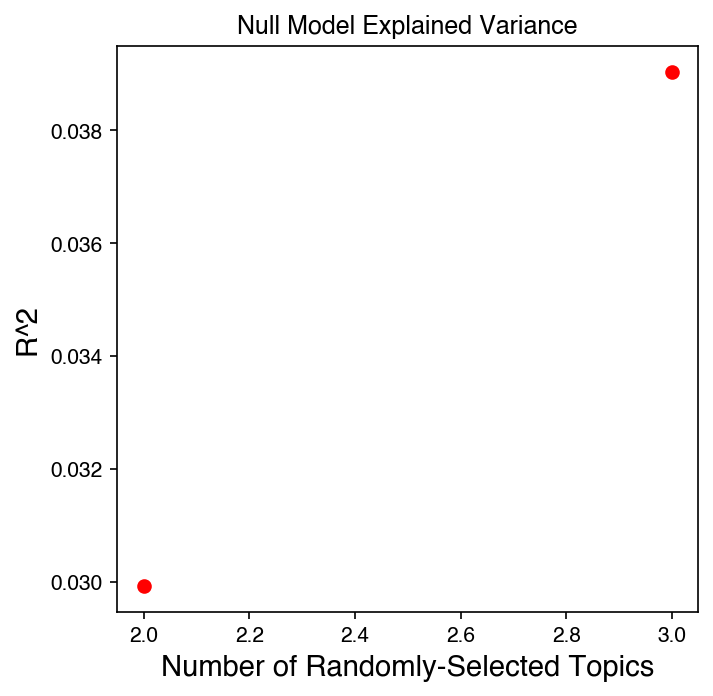

In [5]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(pd.Series(r2_dat['num_topics']), pd.Series(r2_dat['r2']),'ro')
plt.xlabel("Number of Randomly-Selected Topics", size=14)
plt.ylabel("R^2", size=14)
plt.title("Null Model Explained Variance")
#plt.legend(loc='upper right')


## Plot Null BIC values only

Text(0.5, 1.0, 'Null Model Explained Variance')

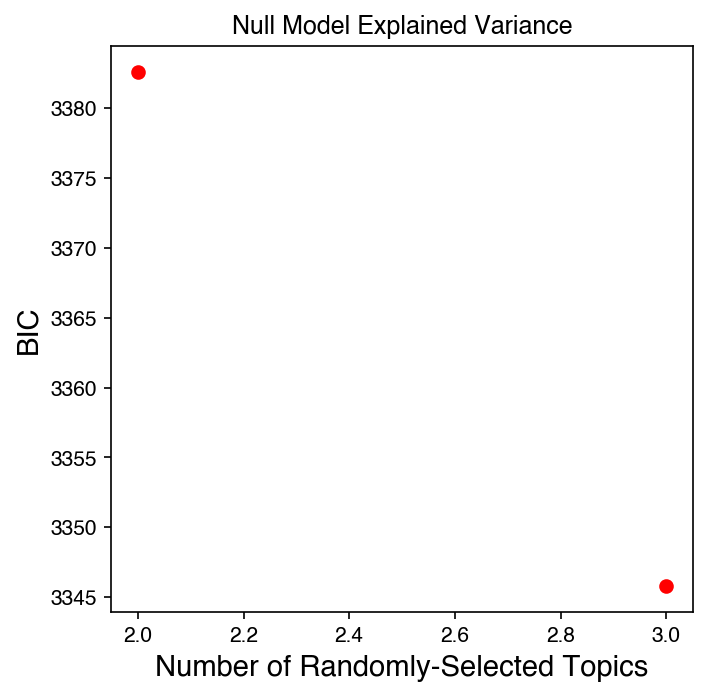

In [6]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(pd.Series(bic_dat['num_topics']), pd.Series(bic_dat['bic']),'ro')
plt.xlabel("Number of Randomly-Selected Topics", size=14)
plt.ylabel("BIC", size=14)
plt.title("Null Model Explained Variance")
#plt.legend(loc='upper right')


### Plot Histogram of R2 values

Crime-Type Bias R-Squared 95%-tile = 0.95    0.039044
Name: scenario_r2, dtype: float64
Crime-Type Bias R-Squared 95%-tile = 0.95    0.039044
Name: scenario_r2, dtype: float64
[0.0, 200.0, 400.0, 600.0, 800.0, 1000.0]
[0.0, 200.0, 400.0, 600.0, 800.0, 1000.0]
   index  Unnamed: 0     event                                   model  \
0     11          11  scenario                   moral_judgment_social   
1     12          12  scenario                       moral_judgment_mj   
2     13          13  scenario  exp_cult_recall_narrative_cult_id_bias   

         r2  
0  0.045235  
1  0.011705  
2  0.054201  


<function matplotlib.pyplot.show(close=None, block=None)>

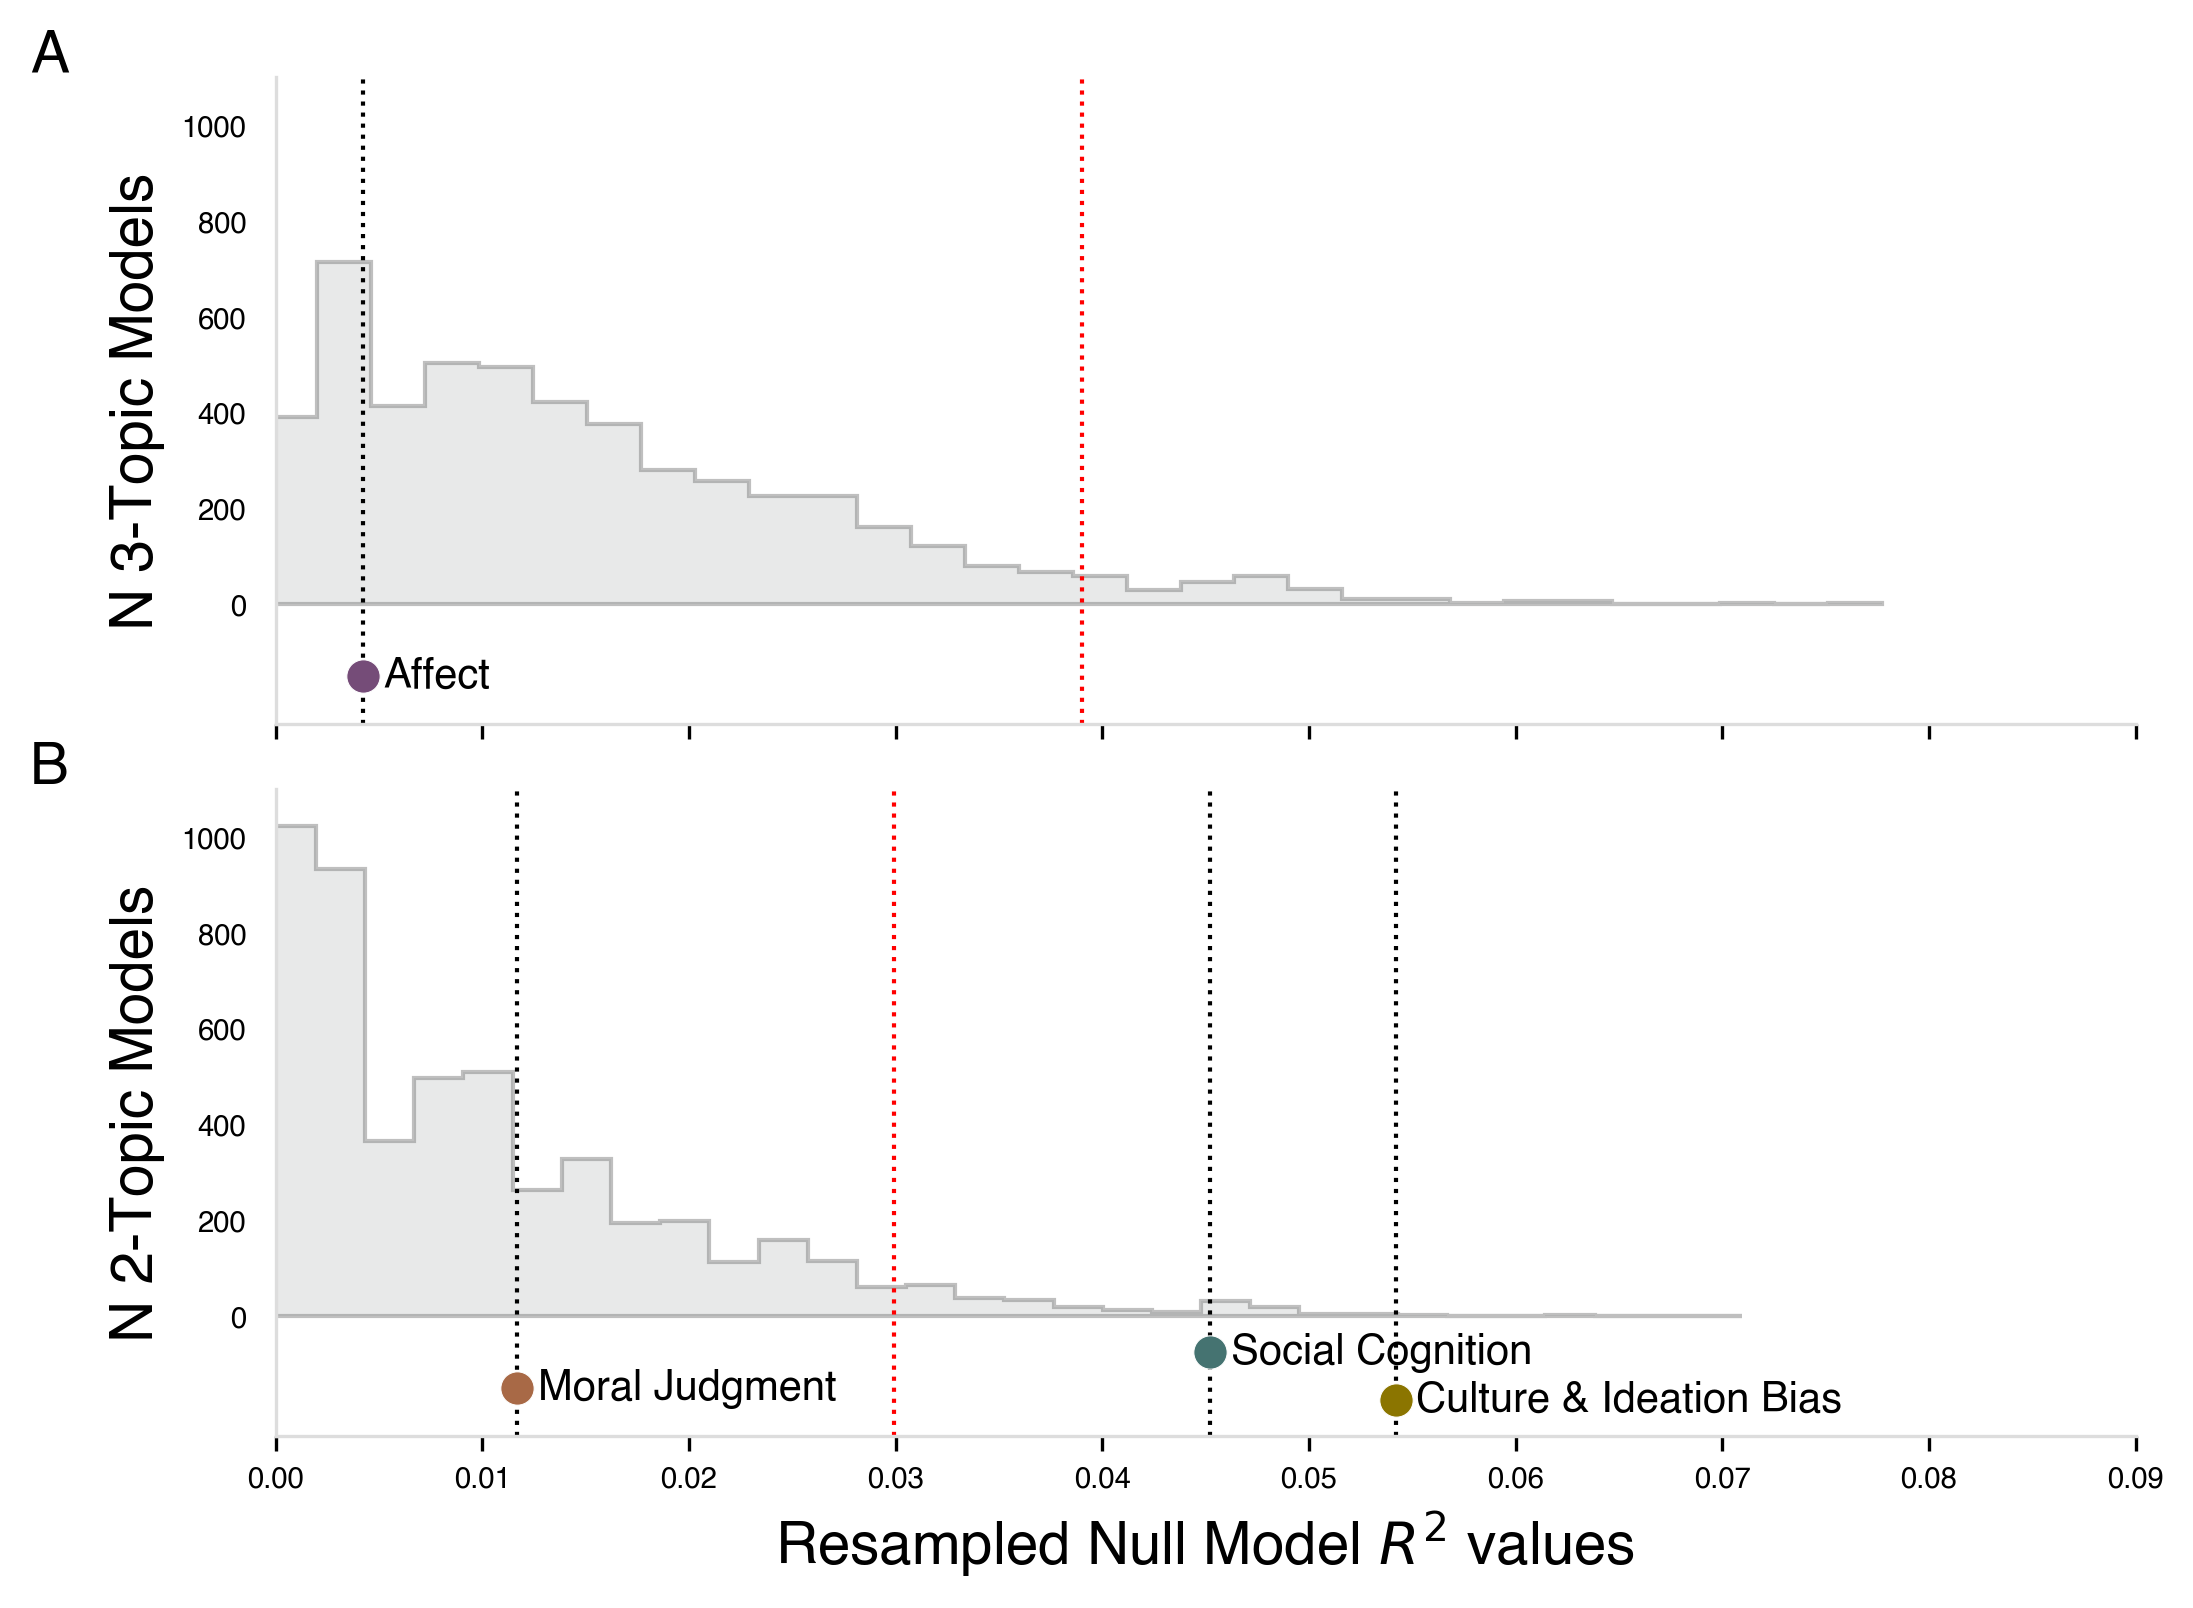

In [7]:
#null r2 data - k=3 topics
res_r2_k3 = pd.read_csv('resampling/resampling_r2_values_scenario_thresholded_k3.csv')
res_scenario_r2_mean = np.mean(pd.Series(res_r2_k3['scenario_r2']))
res_scenario_r2_95_ci = np.percentile(pd.Series(res_r2_k3['scenario_r2']), [2.5, 97.5])
print("Crime-Type Bias R-Squared 95%-tile = {}".format(res_scenario_r2_95_perc_rank))

#null r2 data - k=2 topics
res_r2_k2 = pd.read_csv('resampling/resampling_r2_values_scenario_thresholded_k2.csv')
res_scenario_r2_mean = np.mean(pd.Series(res_r2_k2['scenario_r2']))
res_scenario_r2_95_ci = np.percentile(pd.Series(res_r2_k2['scenario_r2']), [2.5, 97.5])
print("Crime-Type Bias R-Squared 95%-tile = {}".format(res_scenario_r2_95_perc_rank))


#main plot
fig = plt.figure(figsize=(8,6),dpi=300)

gs0 = gridspec.GridSpec(2, 1)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs0[1])



#ax0 = k = 3 topics per model
ax0.hist(pd.Series(res_r2_k3['scenario_r2']), bins=30, density=False, alpha=0.5, edgecolor='grey', linewidth=1,
         histtype = 'stepfilled', color='#D2D4D4')

# Axis styling.
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
#ax0.spines['left'].set_visible(False)
ax0.spines['left'].set_color('#DDDDDD')
ax0.spines['bottom'].set_color('#DDDDDD')
ax0.tick_params(bottom=True, which='major', left=False, labelsize=7)
ax0.yaxis.get_ticklocs(minor=False)
ax0.set_axisbelow(True)
ax0.set(xticklabels=[])
#ax0.xaxis.set_ticklabels([])
#ax0.xaxis.set_visible(True)
#before
#ax1.yaxis.grid(True, color='#EEEEEE')
#ax1.xaxis.grid(False)
#after
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)



# Add axis and chart labels.
#ax0.set_xlabel(r'Resampled Null Model $R^2$ values', size=14)
#ax0.set_title('Permutted distribution', size=14)
ax0.set_ylabel("N 3-Topic Models", size=14)
ax0.set_xlim(0,0.09)
ax0.set_ylim(-250, 1100)

#hide negative value ticks
ticks = [tick for tick in ax0.get_yticks() if tick >=0 and tick < 1101]
print(ticks)
ax0.set_yticks(ticks)


#add 95%-tile model line
null_r2_value = pd.read_csv('resampling/null_model_scenario_r2.csv')
null_r2_value = null_r2_value[null_r2_value['num_topics'] == 3].reset_index()
ax0.axvline(x=null_r2_value['r2'][0], linewidth=1, color='r',linestyle='dotted')


#now add lines/markers for affect, moral judgment, social cognition, cult&id bias
actual_r2 = pd.read_csv('decoding_output/model_r2_thresholded_scenario.csv')
#subset
models_k3 = ['affect']
# selecting rows based on condition
actual_r2 = actual_r2[actual_r2['model'].isin(models_k3)].reset_index()

ax0.axvline(x=actual_r2['r2'][0], linewidth=1, color='black',linestyle='dotted')

#annotate the model
ax0.annotate("Affect",xy=(actual_r2['r2'][0]+.001,-150),fontsize=10,va='center')

#add points?
#colors
col = ['#754C78','#104E8B','#457371','#8B7500','#8B1A1A','#A86946']
#order = affect, moral judgment, utility, ecr, reading, wm
ax0.plot(actual_r2['r2'][0],-150, marker='o', markersize=8,markeredgecolor='white',markerfacecolor=col[0], markeredgewidth=0.25, linestyle='None')




######################

#ax1 = k = 2 topics per model
ax1.hist(pd.Series(res_r2_k2['scenario_r2']), bins=30, density=False, alpha=0.5, edgecolor='grey', linewidth=1,
         histtype = 'stepfilled', color='#D2D4D4')

# Axis styling.
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.tick_params(bottom=True, which='major', left=False, labelsize=7)
ax1.yaxis.get_ticklocs(minor=False)
ax1.set_axisbelow(True)
#before
#ax1.yaxis.grid(True, color='#EEEEEE')
#ax1.xaxis.grid(False)
#after
ax1.xaxis.grid(False)
ax1.yaxis.grid(False)


# Add axis and chart labels.
ax1.set_xlabel(r'Resampled Null Model $R^2$ values', size=14)
#ax1.set_title('Permutted distribution', size=14)
ax1.set_ylabel("N 2-Topic Models", size=14)
ax1.set_xlim(0,0.09)
ax1.set_ylim(-250, 1100)

#hide negative value ticks
ticks = [tick for tick in ax1.get_yticks() if tick >=0 and tick < 1101]
print(ticks)
ax1.set_yticks(ticks)



#add 95%-tile model line
null_r2_value = pd.read_csv('resampling/null_model_scenario_r2.csv')
null_r2_value = null_r2_value[null_r2_value['num_topics'] == 2].reset_index()
ax1.axvline(x=null_r2_value['r2'][0], linewidth=1, color='r',linestyle='dotted')


#now add lines/markers for affect, moral judgment, social cognition, cult&id bias
actual_r2 = pd.read_csv('decoding_output/model_r2_thresholded_scenario.csv')
#subset
models_k2 = ['moral_judgment_mj', 'moral_judgment_social', 'exp_cult_recall_narrative_cult_id_bias']
# selecting rows based on condition
actual_r2 = actual_r2[actual_r2['model'].isin(models_k2)].reset_index()
print(actual_r2)

ax1.axvline(x=actual_r2['r2'][0], linewidth=1, color='black',linestyle='dotted')
ax1.axvline(x=actual_r2['r2'][1], linewidth=1, color='black',linestyle='dotted')
ax1.axvline(x=actual_r2['r2'][2], linewidth=1, color='black',linestyle='dotted')

#annotate the models
ax1.annotate("Social Cognition",xy=(actual_r2['r2'][0]+.001,-75),fontsize=10,va='center')
ax1.annotate("Moral Judgment",xy=(actual_r2['r2'][1]+.001,-150),fontsize=10,va='center')
ax1.annotate("Culture & Ideation Bias",xy=(actual_r2['r2'][2]+.001,-175),fontsize=10,va='center')

#add points?
#colors
col = ['#754C78','#104E8B','#457371','#8B7500','#8B1A1A','#A86946']
#order = affect, moral judgment, utility, ecr, reading, wm
#social cog
ax1.plot(actual_r2['r2'][0],-75, marker='o', markersize=8,markeredgecolor='white',markerfacecolor=col[2], markeredgewidth=0.25, linestyle='None')
#mj
ax1.plot(actual_r2['r2'][1],-150, marker='o', markersize=8, markeredgecolor='white',markerfacecolor=col[5], markeredgewidth=0.25, linestyle='None')
#cult/id bias
ax1.plot(actual_r2['r2'][2],-175, marker='o', markersize=8, markeredgecolor='white',markerfacecolor=col[3], markeredgewidth=0.25, linestyle='None')





#panel labels
ax0.text(-0.01, 1200, 'A',
           fontsize=9, fontweight='bold', va='top', ha='right', size=14)
ax1.text(-0.01, 1200, 'B',
           fontsize=9, fontweight='bold', va='top', ha='right', size=14)

plt.subplots_adjust(hspace=0.10)

plt.show

### Plot Histogram of BIC values

Crime-Type Bias R-Squared 95%-tile = 0.05    3345.77152
Name: scenario_bic, dtype: float64
Crime-Type Bias R-Squared 95%-tile = 0.05    3345.77152
Name: scenario_bic, dtype: float64
[0.0, 200.0, 400.0, 600.0, 800.0, 1000.0]
3 Topic BICs
   index  Unnamed: 0     event   model         bic
0      4           4  scenario  affect  3512.75022
[0.0, 200.0, 400.0, 600.0, 800.0, 1000.0]
2 Topic BICs
   index  Unnamed: 0     event                                   model  \
0     11          11  scenario                   moral_judgment_social   
1     12          12  scenario                       moral_judgment_mj   
2     13          13  scenario  exp_cult_recall_narrative_cult_id_bias   

           bic  
0  3308.006004  
1  3469.884207  
2  3263.757252  


<function matplotlib.pyplot.show(close=None, block=None)>

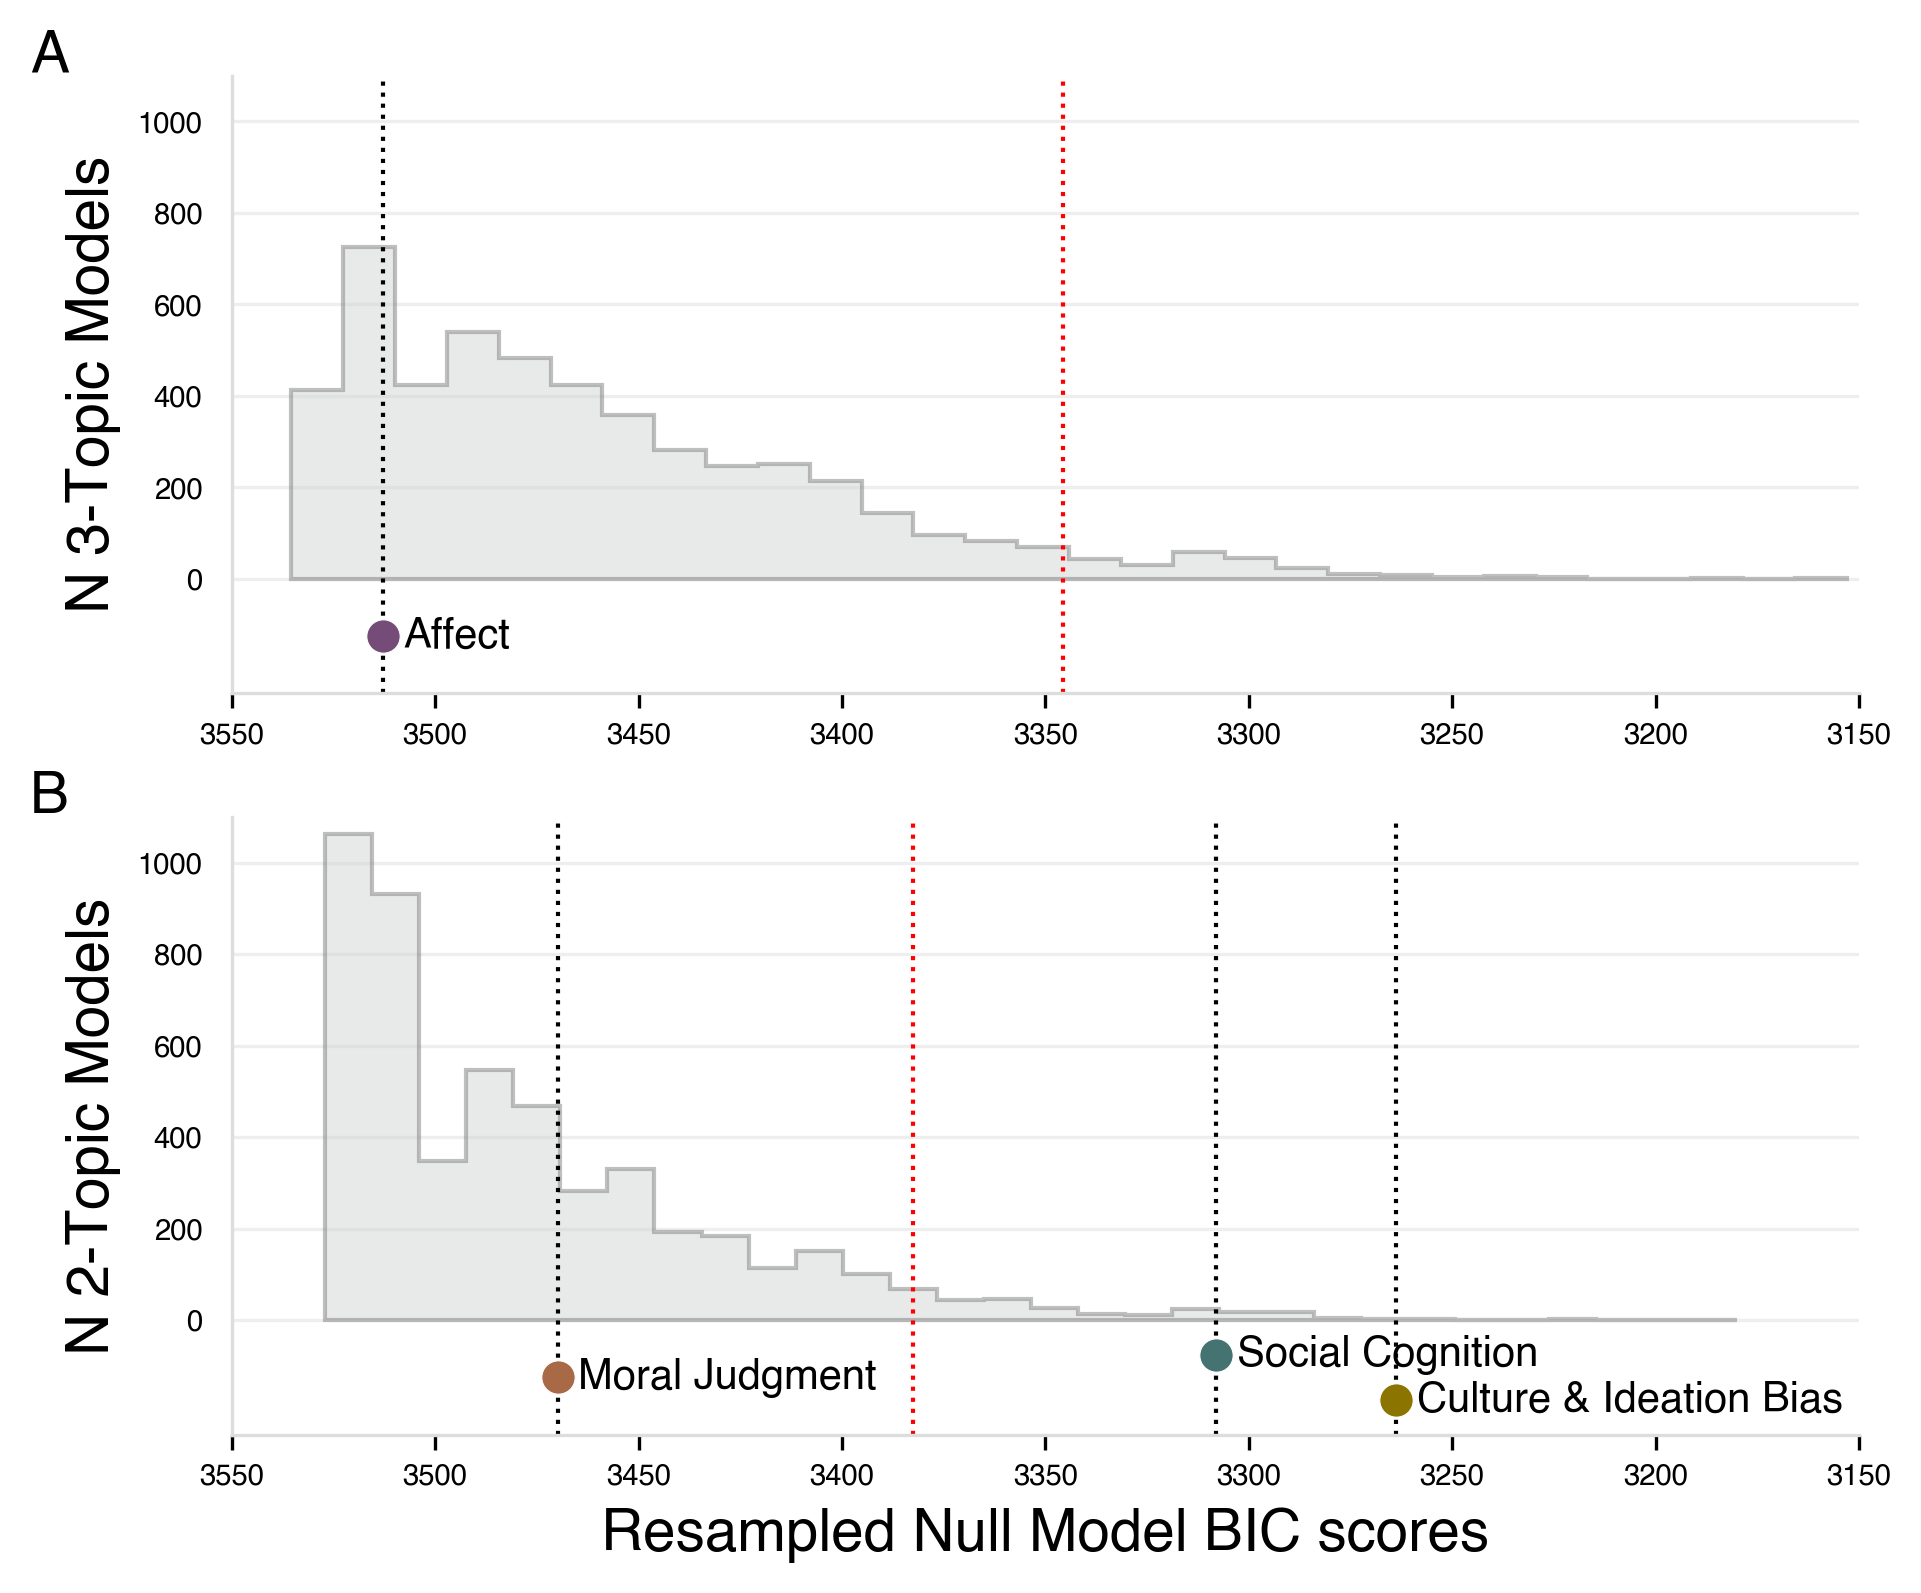

In [11]:
#null r2 data - k=3 topics
res_bic_k3 = pd.read_csv('resampling/resampling_r2_values_scenario_thresholded_k3.csv')
res_scenario_bic_mean = np.mean(pd.Series(res_bic_k3['scenario_bic']))
res_scenario_bic_95_ci = np.percentile(pd.Series(res_bic_k3['scenario_bic']), [2.5, 97.5])
print("Crime-Type Bias R-Squared 95%-tile = {}".format(res_scenario_bic_95_perc_rank))

#null r2 data - k=2 topics
res_bic_k2 = pd.read_csv('resampling/resampling_r2_values_scenario_thresholded_k2.csv')
res_scenario_bic_mean = np.mean(pd.Series(res_bic_k2['scenario_bic']))
res_scenario_bic_95_ci = np.percentile(pd.Series(res_bic_k2['scenario_bic']), [2.5, 97.5])
print("Crime-Type Bias R-Squared 95%-tile = {}".format(res_scenario_bic_95_perc_rank))


#main plot
fig = plt.figure(figsize=(7,6),dpi=300)

gs0 = gridspec.GridSpec(2, 1)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs0[1])



#ax0 = k = 3 topics per model
ax0.hist(pd.Series(res_bic_k3['scenario_bic']), bins=30, density=False, alpha=0.5, edgecolor='grey', linewidth=1,
         histtype = 'stepfilled', color='#D2D4D4')

# Axis styling.
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
#ax0.spines['left'].set_visible(False)
ax0.spines['left'].set_color('#DDDDDD')
ax0.spines['bottom'].set_color('#DDDDDD')
ax0.tick_params(bottom=True, which='major', left=False, labelsize=7)
ax0.yaxis.get_ticklocs(minor=False)
ax0.set_axisbelow(True)
ax0.yaxis.grid(True, color='#EEEEEE')
ax0.xaxis.grid(False)
#ax0.set(xticklabels=[])
#ax0.xaxis.set_ticklabels([])
#ax0.xaxis.set_visible(True)


# Add axis and chart labels.
#ax0.set_xlabel(r'Resampled Null Model $R^2$ values', size=14)
#ax0.set_title('Permuted distribution', size=14)
ax0.set_ylabel("N 3-Topic Models", size=14)
#ax1.set_xlim(3150,3550)
ax0.set_xlim(3550,3150)

ax0.set_ylim(-250, 1100)

#hide negative value ticks
ticks = [tick for tick in ax0.get_yticks() if tick >=0 and tick < 1101]
print(ticks)
ax0.set_yticks(ticks)

#add 95%-tile model line
null_bic_value = pd.read_csv('resampling/null_model_scenario_r2.csv')
null_bic_value = null_bic_value[null_bic_value['num_topics'] == 3].reset_index()
ax0.axvline(x=null_bic_value['bic'][0], linewidth=1, color='r',linestyle='dotted')


#now add lines/markers for affect, moral judgment, social cognition, cult&id bias
actual_bic = pd.read_csv('decoding_output/model_bic_thresholded_scenario.csv')
#subset
models_k3 = ['affect']
# selecting rows based on condition
actual_bic = actual_bic[actual_bic['model'].isin(models_k3)].reset_index()

print('3 Topic BICs')
print(actual_bic)

ax0.axvline(x=actual_bic['bic'][0], linewidth=1, color='black',linestyle='dotted')

#annotate the model
ax0.annotate("Affect",xy=(actual_bic['bic'][0]-5,-125),fontsize=10,va='center')

#add points?
#colors
col = ['#754C78','#104E8B','#457371','#8B7500','#8B1A1A','#A86946']
#order = affect, moral judgment, utility, ecr, reading, wm
ax0.plot(actual_bic['bic'][0],-125, marker='o', markersize=8,markeredgecolor='white',markerfacecolor=col[0], markeredgewidth=0.25, linestyle='None')




######################

#ax1 = k = 2 topics per model
ax1.hist(pd.Series(res_bic_k2['scenario_bic']), bins=30, density=False, alpha=0.5, edgecolor='grey', linewidth=1,
         histtype = 'stepfilled', color='#D2D4D4')

# Axis styling.
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['left'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.tick_params(bottom=True, which='major', left=False, labelsize=7)
ax1.yaxis.get_ticklocs(minor=False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color='#EEEEEE')
ax1.xaxis.grid(False)
#ax1.set(xticklabels=[])


# Add axis and chart labels.
ax1.set_xlabel(r'Resampled Null Model BIC scores', size=14)
#ax1.set_title('Permuted distribution', size=14)
ax1.set_ylabel("N 2-Topic Models", size=14)
#ax1.set_xlim(3150,3550)
ax1.set_xlim(3550,3150)

ax1.set_ylim(-250, 1100)

#hide negative value ticks
ticks = [tick for tick in ax1.get_yticks() if tick >=0 and tick < 1101]
print(ticks)
ax1.set_yticks(ticks)

#add 95%-tile model line
null_bic_value = pd.read_csv('resampling/null_model_scenario_r2.csv')
null_bic_value = null_bic_value[null_bic_value['num_topics'] == 2].reset_index()
ax1.axvline(x=null_bic_value['bic'][0], linewidth=1, color='r',linestyle='dotted')


#now add lines/markers for affect, moral judgment, social cognition, cult&id bias
actual_bic = pd.read_csv('decoding_output/model_bic_thresholded_scenario.csv')
#subset
models_k2 = ['moral_judgment_mj', 'moral_judgment_social', 'exp_cult_recall_narrative_cult_id_bias']
# selecting rows based on condition
actual_bic = actual_bic[actual_bic['model'].isin(models_k2)].reset_index()
print('2 Topic BICs')
print(actual_bic)

ax1.axvline(x=actual_bic['bic'][0], linewidth=1, color='black',linestyle='dotted')
ax1.axvline(x=actual_bic['bic'][1], linewidth=1, color='black',linestyle='dotted')
ax1.axvline(x=actual_bic['bic'][2], linewidth=1, color='black',linestyle='dotted')

#annotate the models
ax1.annotate("Social Cognition",xy=(actual_bic['bic'][0]-5,-75),fontsize=10,va='center')
ax1.annotate("Moral Judgment",xy=(actual_bic['bic'][1]-5,-125),fontsize=10,va='center')
ax1.annotate("Culture & Ideation Bias",xy=(actual_bic['bic'][2]-5,-175),fontsize=10,va='center')

#add points?
#colors
col = ['#754C78','#104E8B','#457371','#8B7500','#8B1A1A','#A86946']
#order = affect, moral judgment, utility, ecr, reading, wm
#social cog
ax1.plot(actual_bic['bic'][0],-75, marker='o', markersize=8,markeredgecolor='white',markerfacecolor=col[2], markeredgewidth=0.25, linestyle='None')
#mj
ax1.plot(actual_bic['bic'][1],-125, marker='o', markersize=8, markeredgecolor='white',markerfacecolor=col[5], markeredgewidth=0.25, linestyle='None')
#cult/id bias
ax1.plot(actual_bic['bic'][2],-175, marker='o', markersize=8, markeredgecolor='white',markerfacecolor=col[3], markeredgewidth=0.25, linestyle='None')



#panel labels
ax0.text(3590, 1200, 'A',
           fontsize=9, fontweight='bold', va='top', ha='right', size=14)
ax1.text(3590, 1200, 'B',
           fontsize=9, fontweight='bold', va='top', ha='right', size=14)

plt.subplots_adjust(hspace=0.20)

plt.show